In [0]:
import numpy as np
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud
from sklearn.metrics.pairwise import linear_kernel
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from nltk.corpus import stopwords
import string
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from afinn import Afinn

In [0]:
df = pd.read_csv('/Users/jumananadir/Downloads/Eluvio_DS_Challenge.csv')

In [4]:
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [7]:
df.shape

(509236, 8)

In [8]:
df.up_votes.unique()

array([   3,    2,    1, ..., 2321, 6824, 3360])

In [9]:
df.down_votes.unique()

array([0])

In [10]:
df.category.unique()

array(['worldnews'], dtype=object)

In [11]:
df.over_18.unique()

array([False,  True])

In [12]:
df.dtypes

time_created     int64
date_created    object
up_votes         int64
down_votes       int64
title           object
over_18           bool
author          object
category        object
dtype: object

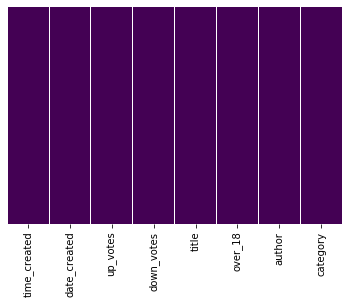

In [13]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [14]:
df.isna().sum()

time_created    0
date_created    0
up_votes        0
down_votes      0
title           0
over_18         0
author          0
category        0
dtype: int64

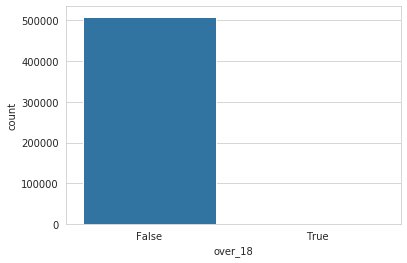

In [15]:
sns.set_style('whitegrid')
sns.countplot(x = 'over_18', data = df)

# Wordcloud of the complete dataset 'titles'

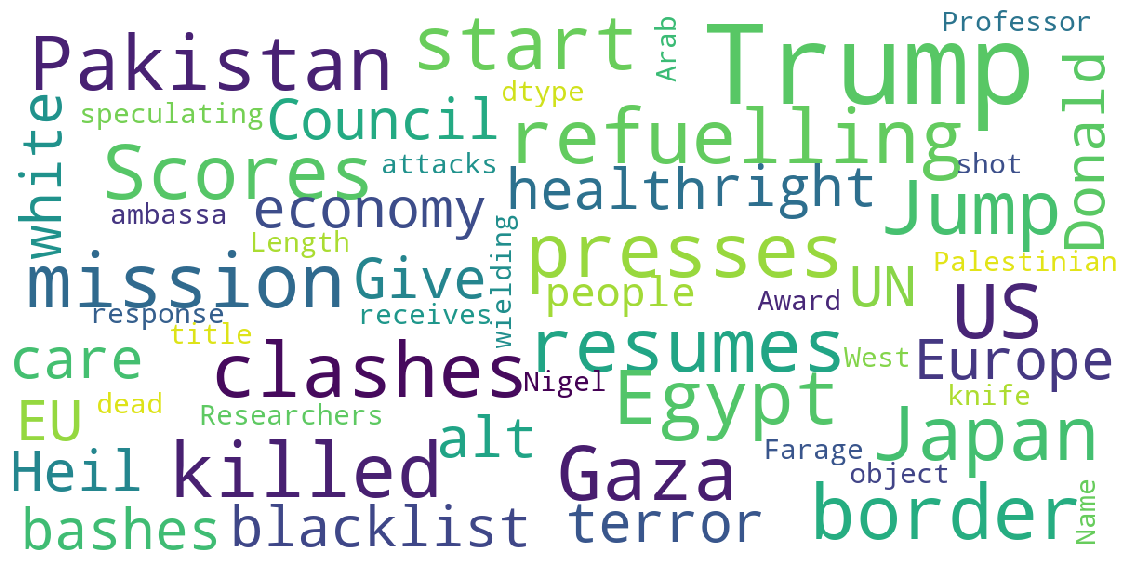

In [16]:
data=df["title"]
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')

fig.suptitle(None, fontsize = 20)
fig.subplots_adjust(top = 2.3)

plt.imshow(wordcloud)
plt.show()

In [0]:
def clean_text(df):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", df.lower())
    return re.sub(r'\W+', ' ', clean1)

In [0]:
symbols = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', 
           ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', 
           '#', '*', '+', '\\', '•',  '~', '@', '£', '·', '_', 
           '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', 
           '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', 
           '½', 'à', '…', '“', '★', '”', '–', '●', 'â', '►', 
           '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', 
           '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', '▒', '：', 
           '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', 
           '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', 
           '‘', '∞', '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', 
           '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', 
           '¹', '≤', '‡', '√', '[video]','’',]

In [0]:
def clean_symbol(text):
    text = str(text)
    for symbol in symbols:
        text = text.replace(symbol, '')
    return text

# remove symbols and punctuations 
df['title'] = df['title'].apply(lambda x: clean_symbol(x))

In [0]:
df.drop(['down_votes'], axis=1, inplace = True)

In [0]:
df.drop(['author'], axis=1, inplace = True)

In [0]:
df.drop(['category'], axis=1, inplace = True)

# Afinn Sentiment Analysis Score

In [0]:
afinn = Afinn(language='en')
df['afinn_score'] = df['title'].apply(afinn.score)

In [24]:
df.head()

,time_created,date_created,up_votes,title,over_18,afinn_score
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,False,-3.0
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,0.0
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,False,0.0
3,1201233290,2008-01-25,1,Jumpstart economy Give health care to all,False,2.0
4,1201274720,2008-01-25,4,Council of Europe bashes EUUN terror blacklist,False,-3.0


In [0]:
titles = df["title"]

In [0]:
# tokenize all titles in the data
titles_token = titles.apply(lambda x: x.split())

In [12]:
print('Average word length of titles is {0:.0f}.'.format(np.mean(titles_token.apply(lambda x: len(x)))))
print('Max word length of titles is {0:.0f}.'.format(np.max(titles_token.apply(lambda x: len(x)))))
print('Min word length of titles is {0:.0f}.'.format(np.min(titles_token.apply(lambda x: len(x)))))

Average word length of titles is 14.
Max word length of titles is 63.
Min word length of titles is 0.


In [13]:
count = [len(title) for title in titles_token]
pd.Series(count).value_counts()

9     58072
8     54562
10    52103
7     42643
11    41476
      ...  
60        5
61        4
0         3
62        1
63        1
Length: 64, dtype: int64

In [0]:
stop_words = set(stopwords.words('english'))
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Applying K-means clustering and Viewing clusters

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_features=200000,
                                       use_idf=True,
                                       stop_words='english')

In [0]:
documents = df['title']

In [0]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [0]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
y_kmeans= model.fit(X)

In [34]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 china
 says
 new
 israel
 iran
 police
 world
 killed
 attack
 korea
Cluster 1:
 set
 muslim
 dies
 brotherhood
 egypt
 world
 man
 new
 leader
 woman
Cluster 2:
 syria
 russia
 ukraine
 says
 putin
 assad
 war
 chemical
 military
 russian


In [35]:
Y = vectorizer.transform(["new killed between kashmir and indian."])
prediction = model.predict(Y)
print(prediction)

[0]


In [36]:
Y = vectorizer.transform(["My cat attack police."])
prediction = model.predict(Y)
print(prediction)

[0]


# Creating Dataframes for each year

In [0]:
df2008 = df[(df['date_created'] > '2008-01-24') & (df['date_created'] <= '2008-12-31')]

In [38]:
df2008.head()

,time_created,date_created,up_votes,title,over_18,afinn_score
0,1201232046,2008-01-25,3,Scores killed Pakistan clashes,False,-3.0
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,False,0.0
2,1201232523,2008-01-25,3,US presses Egypt Gaza border,False,0.0
3,1201233290,2008-01-25,1,Jumpstart economy Give health care,False,2.0
4,1201274720,2008-01-25,4,Council Europe bashes EUUN terror blacklist,False,-3.0


In [0]:
df2009 = df[(df['date_created'] > '2009-01-01') & (df['date_created'] <= '2009-12-31')]

In [40]:
df2009.tail()

,time_created,date_created,up_votes,title,over_18,afinn_score
47615,1262293660,2009-12-31,2,TV UK go back 405 lines black white,False,0.0
47616,1262293929,2009-12-31,14,Harper suspends parliament dodge torture inves...,False,-4.0
47617,1262296461,2009-12-31,9,North Korea calls end hostile relations US Reu...,False,-2.0
47618,1262296605,2009-12-31,18,Man wrongly convicted raping 8yo boy freed 35 ...,False,-4.0
47619,1262300490,2009-12-31,2,Stabilizing climate We must look beyond intern...,False,0.0


In [0]:
df2010 = df[(df['date_created'] > '2010-01-01') & (df['date_created'] <= '2010-12-31')]

In [42]:
df2010.tail()

,time_created,date_created,up_votes,title,over_18,afinn_score
70928,1293836414,2010-12-31,3,Pakistanis Rally Against Changing Blasphemy Law,False,0.0
70929,1293836675,2010-12-31,11,Egypt bars Iranian activists Gaza Reuters,False,0.0
70930,1293836877,2010-12-31,6,Brazil Lula decides extraditing Italian Reuters,False,0.0
70931,1293831086,2010-12-31,156,WikiLeaks hackers say Zim websites shut Cyber ...,False,-1.0
70932,1293834479,2010-12-31,265,China first known stealth aircraft emerged sec...,False,0.0


In [0]:
df2011 = df[(df['date_created'] > '2011-01-01') & (df['date_created'] <= '2011-12-31')]

In [44]:
df2011.tail()

,time_created,date_created,up_votes,title,over_18,afinn_score
109814,1325372492,2011-12-31,71,Hounded economic crisis shows signs letting po...,False,-4.0
109815,1325373355,2011-12-31,0,North Korean citizens would serve human shield...,False,1.0
109816,1325373500,2011-12-31,20,Iran proposes renewed nuclear talks,False,0.0
109817,1325374276,2011-12-31,3,North Koreans urged defend JongUn death,False,-2.0
109818,1325353020,2011-12-31,1201,Vancouver unveils free crack pipe program,False,1.0


In [0]:
df2012 = df[(df['date_created'] > '2012-01-01') & (df['date_created'] <= '2012-12-31')]

In [46]:
df2012.tail()

,time_created,date_created,up_votes,title,over_18,afinn_score
152457,1356995729,2012-12-31,4,Ruthless Smuggling Rings Put Rhinos Cross Hair...,False,-5.0
152458,1356996179,2012-12-31,0,Hundreds protest Tel Aviv demand migrant depor...,False,-5.0
152459,1356997081,2012-12-31,0,ChinaJapan territorial dispute stems fascinati...,False,1.0
152460,1356997816,2012-12-31,32,Ghana bans secondhand fridges A ban import sec...,False,-4.0
152461,1356998225,2012-12-31,16,South Africa Six policejob applicants die tryi...,False,-4.0


In [0]:
df2013 = df[(df['date_created'] > '2013-01-01') & (df['date_created'] <= '2013-12-31')]

In [16]:
df2013.tail()

,time_created,date_created,up_votes,title,over_18
240688,1388529720,2013-12-31,26,Saudi Leader group linked alQaeda arrested mil...,False
240689,1388529742,2013-12-31,0,In viral strangely hypnotic Vine footage unide...,False
240690,1388530797,2013-12-31,1,A new study Finland suggests connections emoti...,False
240691,1388531866,2013-12-31,280,Hidden Poverty The Well People Of Beijing Dubb...,False
240692,1388531870,2013-12-31,0,Fireworks fear Latvia joins euro zone,False


In [0]:
df2014 = df[(df['date_created'] > '2014-01-01') & (df['date_created'] <= '2014-12-31')]

In [18]:
df2014.tail()

,time_created,date_created,up_votes,title,over_18
332718,1420067806,2014-12-31,352,British police reportedly arrested Lizard Squa...,False
332719,1420067920,2014-12-31,43,Stray donkey causes chaos important ISIS stron...,False
332720,1420068222,2014-12-31,7,US condemns Cuba practice repressing activists...,False
332721,1420068535,2014-12-31,9,Cuba Dissidents Are Detained,False
332722,1420069922,2014-12-31,1,AirAsias Chief Responds Crisis With Quick Comp...,False


In [0]:
df2015 = df[(df['date_created'] > '2015-01-01') & (df['date_created'] <= '2015-12-31')]

In [20]:
df2015.tail()

,time_created,date_created,up_votes,title,over_18
427339,1451601412,2015-12-31,5,Special court decide female prisoners cases Af...,False
427340,1451601707,2015-12-31,0,Amazon donates profits farright anthem refugees,False
427341,1451601963,2015-12-31,0,Belgian Police Probing Report Orgy Police Sold...,False
427342,1451603918,2015-12-31,15,US military construction set ramp Poland,False
427343,1451605366,2015-12-31,23,ISIS takes responsibility Christmas attack Fri...,False


In [0]:
df2016 = df[(df['date_created'] > '2016-01-01') & (df['date_created'] <= '2016-12-31')]

In [22]:
df2016.tail()

,time_created,date_created,up_votes,title,over_18
509231,1479816764,2016-11-22,5,Heil Trump Donald Trump altright white nationa...,False
509232,1479816772,2016-11-22,1,There people speculating could Madeleine McCann,False
509233,1479817056,2016-11-22,1,Professor receives Arab Researchers Award,False
509234,1479817157,2016-11-22,1,Nigel Farage attacks response Trump ambassador...,False
509235,1479817346,2016-11-22,1,Palestinian wielding knife shot dead West Bank...,False


# In the below section, I have clustered the Similar News Titles for each year

# Year 2008

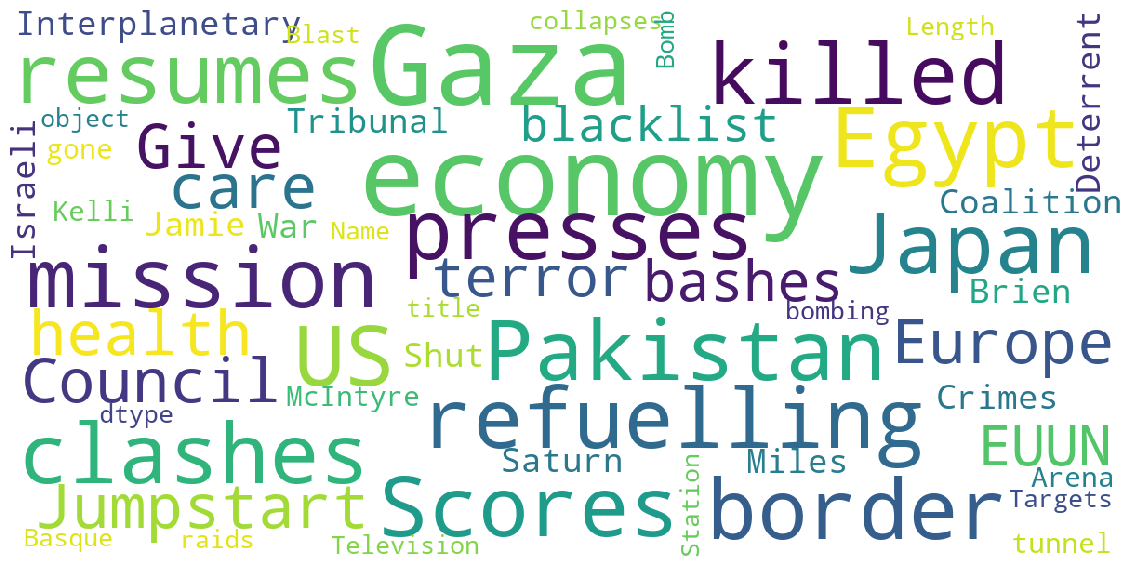

In [55]:
data=df2008["title"]
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')

fig.suptitle(None, fontsize = 20)
fig.subplots_adjust(top = 2.3)

plt.imshow(wordcloud)
plt.show()

In [0]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df2008.title.values)
features = vec.transform(df2008.title.values)

In [57]:
random_state = 0 
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [58]:
cls.predict(features)
cls.labels_

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

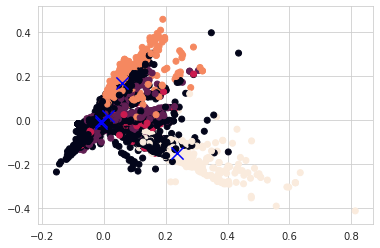

In [60]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# Year 2009

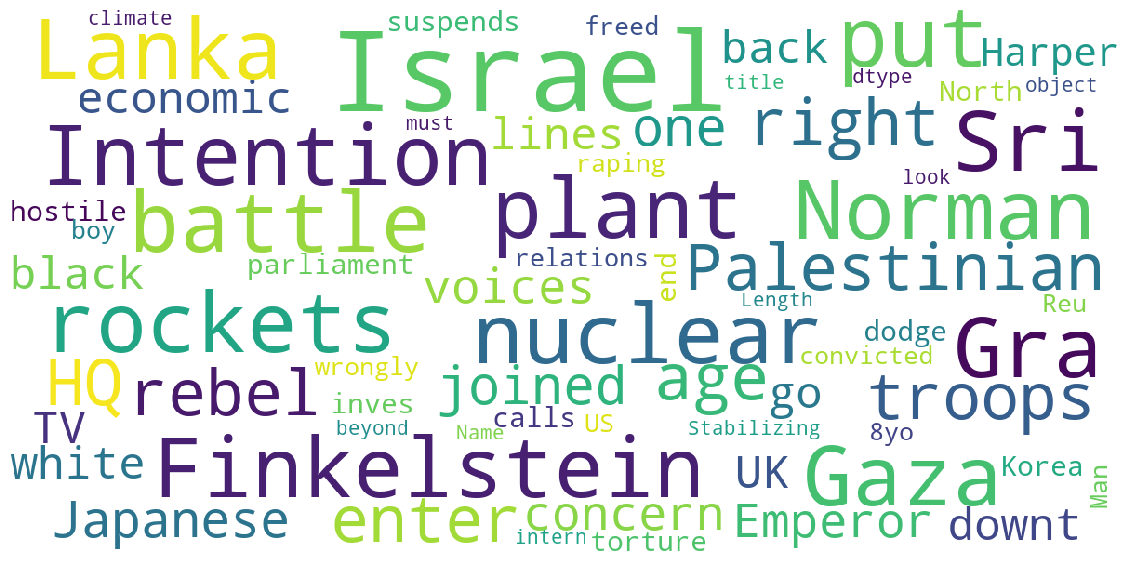

In [61]:
data=df2009["title"]
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')

fig.suptitle(None, fontsize = 20)
fig.subplots_adjust(top = 2.3)

plt.imshow(wordcloud)
plt.show()

In [0]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df2009.title.values)
features = vec.transform(df2009.title.values)

In [63]:
random_state = 0 
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [64]:
cls.predict(features)
cls.labels_

array([3, 3, 3, ..., 3, 3, 3], dtype=int32)

In [0]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

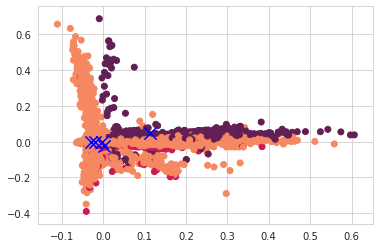

In [66]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# Year 2010

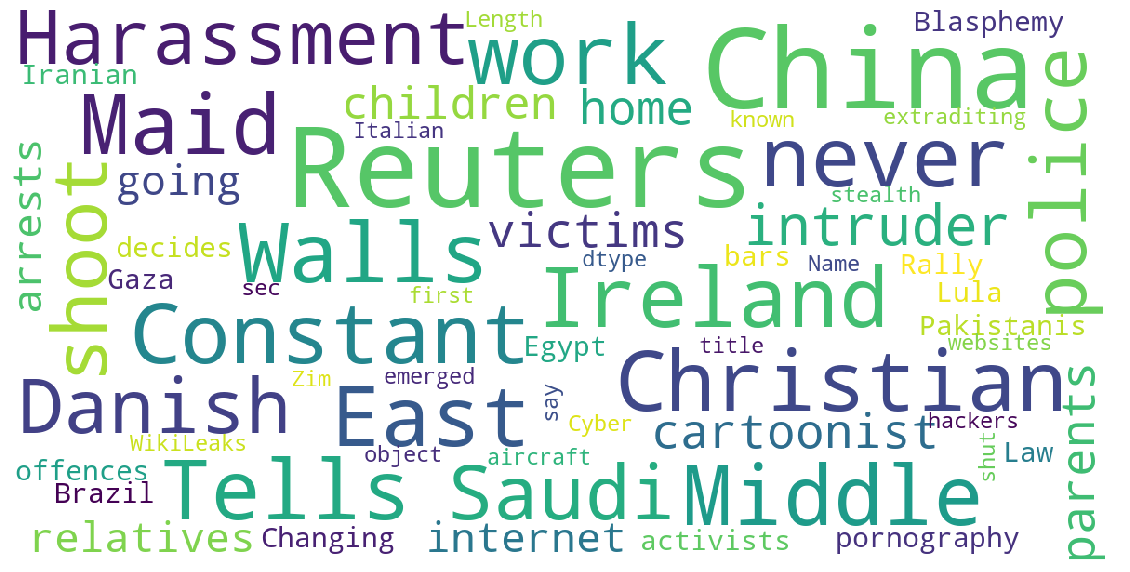

In [67]:
data=df2010["title"]
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')

fig.suptitle(None, fontsize = 20)
fig.subplots_adjust(top = 2.3)

plt.imshow(wordcloud)
plt.show()

In [0]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df2010.title.values)
features = vec.transform(df2010.title.values)

In [69]:
random_state = 0 
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [70]:
cls.predict(features)
cls.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

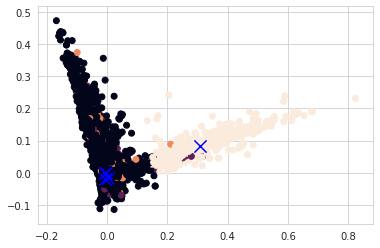

In [72]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# Year 2011

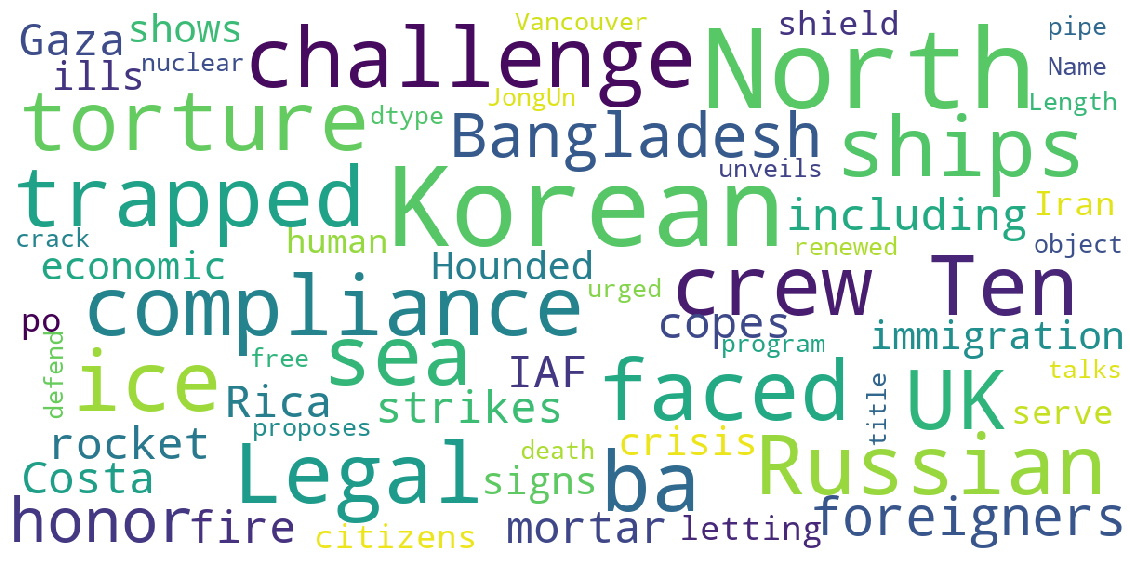

In [73]:
data=df2011["title"]
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')

fig.suptitle(None, fontsize = 20)
fig.subplots_adjust(top = 2.3)

plt.imshow(wordcloud)
plt.show()

In [0]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df2011.title.values)
features = vec.transform(df2011.title.values)

In [75]:
random_state = 0 
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [76]:
cls.predict(features)
cls.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [0]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

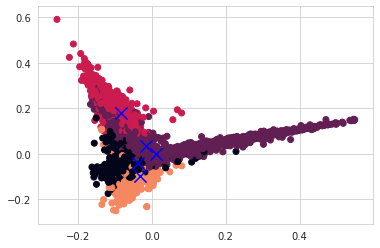

In [78]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# Year 2012

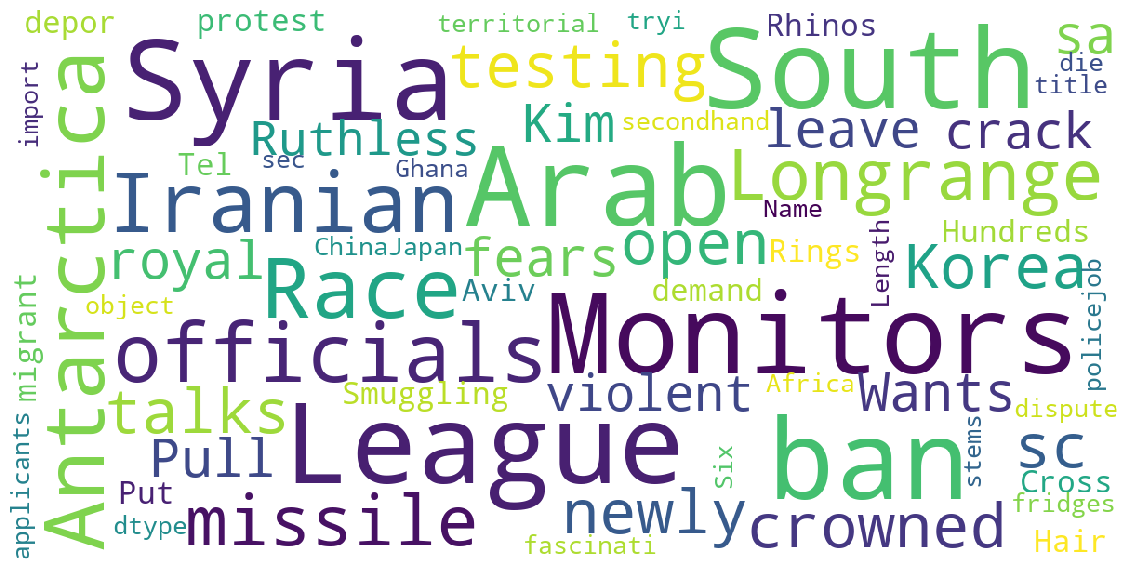

In [79]:
data=df2012["title"]
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')

fig.suptitle(None, fontsize = 20)
fig.subplots_adjust(top = 2.3)

plt.imshow(wordcloud)
plt.show()

In [0]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df2012.title.values)
features = vec.transform(df2012.title.values)

In [81]:
random_state = 0 
cls = MiniBatchKMeans(n_clusters=5, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [82]:
cls.predict(features)
cls.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

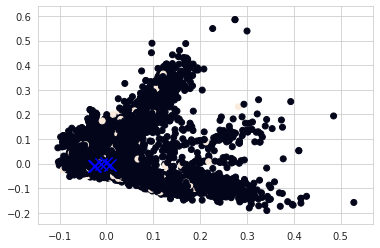

In [84]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# Year 2013

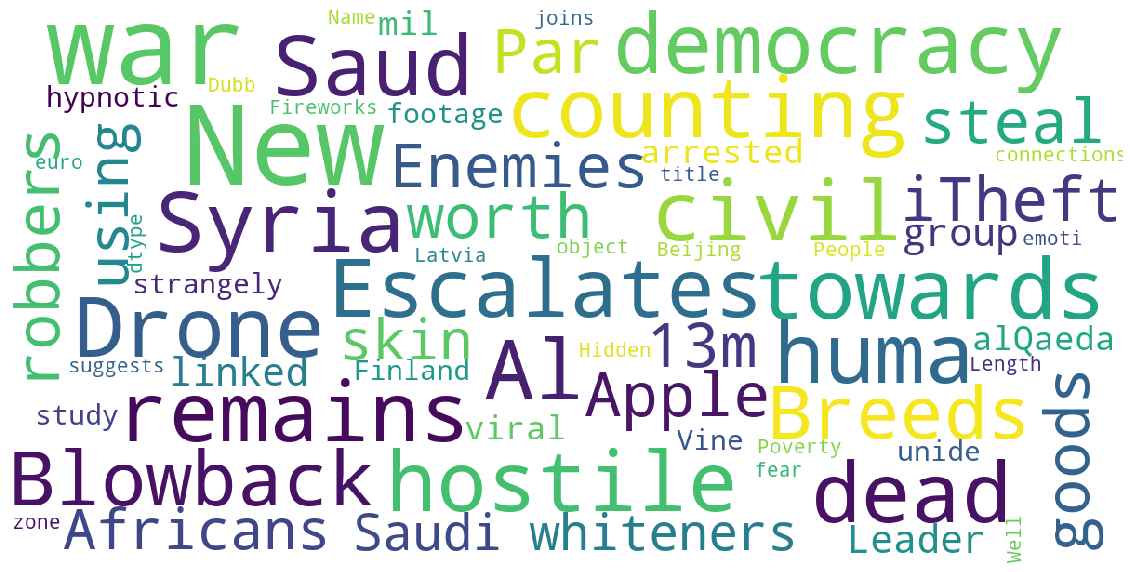

In [24]:
data=df2013["title"]
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')

fig.suptitle(None, fontsize = 20)
fig.subplots_adjust(top = 2.3)

plt.imshow(wordcloud)
plt.show()

In [0]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df2013.title.values)
features = vec.transform(df2013.title.values)

In [24]:
random_state = 0 
cls = MiniBatchKMeans(n_clusters=3, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [25]:
cls.predict(features)
cls.labels_

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [0]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

In [0]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# Year 2014

In [0]:
data=df2014["title"]
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')

fig.suptitle(None, fontsize = 20)
fig.subplots_adjust(top = 2.3)

plt.imshow(wordcloud)
plt.show()

In [0]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df2014.title.values)
features = vec.transform(df2014.title.values)

In [0]:
random_state = 0 
cls = MiniBatchKMeans(n_clusters=3, random_state=random_state)
cls.fit(features)

In [0]:
cls.predict(features)
cls.labels_

In [0]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

In [0]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# Year 2015

In [0]:
data=df2015["title"]
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')

fig.suptitle(None, fontsize = 20)
fig.subplots_adjust(top = 2.3)

plt.imshow(wordcloud)
plt.show()

In [0]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df2015.title.values)
features = vec.transform(df2015.title.values)

In [0]:
random_state = 0 
cls = MiniBatchKMeans(n_clusters=3, random_state=random_state)
cls.fit(features)

In [0]:
cls.predict(features)
cls.labels_

In [0]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

In [0]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# Year 2016

In [0]:
data=df2016["title"]
wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

fig = plt.figure(1, figsize = (20, 20))
plt.axis('off')

fig.suptitle(None, fontsize = 20)
fig.subplots_adjust(top = 2.3)

plt.imshow(wordcloud)
plt.show()

In [0]:
vec = TfidfVectorizer(stop_words="english")
vec.fit(df2016.title.values)
features = vec.transform(df2016.title.values)

In [0]:
random_state = 0 
cls = MiniBatchKMeans(n_clusters=3, random_state=random_state)
cls.fit(features)

In [0]:
cls.predict(features)
cls.labels_

In [0]:
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

In [0]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [0]:
#plt.hist(df.title.values, bins = range(0, 500, 50))
#plt.xlabel('no of characters')
#plt.ylabel('no of titles')
#plt.show()

In [0]:
#print(df['date_created'].min())
#df['date_created'].max()